# Practical 7 Part 2B
The goal of this part of the practical is to take a real image containing
a planar black square and figure out the transformation between the square
and the camera.  We will then draw a wire-frame cube with it's base
corners at the corner of the square.  You should use this
template for your code and fill in the missing sections marked "TO DO"

We built the components we need in part 2A, so half the battle is complete! And you can copy those functions over. Now we'd like to make something cool. We have an image with a plane in world space. We're given the location of some points that lie on the plane and their corresponding image space points. We can use these to estimate a transformation matrix `TEst`. 

We can then use this transformation matrix and the camera instrinsics to project a 3D cube into image space! First step on the ladder to AR.

## Import libraries 

importing Jupyter notebook from practical2A.ipynb
importing Jupyter notebook from practical1A.ipynb


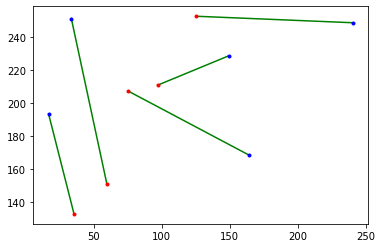

Sqaured difference between pts2Cart and pts2EstCart is: 10.08


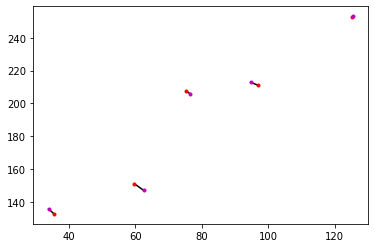

[[267.4170882  230.95045427 531.42492013 482.36049098 378.77537982]
 [396.26814909 288.11435494 237.83410247 358.39940241 329.44079538]]
Imcart before noise
[[267.4170882  230.95045427 531.42492013 482.36049098 378.77537982]
 [396.26814909 288.11435494 237.83410247 358.39940241 329.44079538]]
-------
Imcart after noise
[[268.51690512 232.32972651 532.05702014 482.92056992 379.9941106 ]
 [397.5975532  288.6435456  238.90409702 359.76282408 330.76795555]]
-------
[[ 9.851e-01 -4.490e-02  1.660e-01  4.574e+01]
 [-1.628e-01 -5.547e-01  8.159e-01  6.911e+01]
 [ 5.544e-02 -8.308e-01 -5.538e-01  4.883e+02]
 [ 0.000e+00  0.000e+00  0.000e+00  1.000e+00]]


[[ 9.851e-01 -4.920e-02  1.619e-01  4.600e+01]
 [-1.623e-01 -5.520e-01  8.181e-01  7.000e+01]
 [ 4.900e-02 -8.324e-01 -5.518e-01  5.009e+02]
 [ 0.000e+00  0.000e+00  0.000e+00  1.000e+00]]


practical2A.ipynb:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  "The second component is a method to estimate a Eucledian transformation, `TEst`, that takes us from a plane's 3D coordinate space to 3D camera space by utilizing a given set of points in camera image space, `XImCart`, and a set of corresponding points in world space, `XCart`. Essentially we want to compute the extrinsics matrix we can use in `projectiveCamera`.\n",


In [1]:
%matplotlib inline
import os 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

import import_ipynb
from practical2A import estimatePlanePose

## Load and display the image

The red points mark the coordinates of the corners of the points on the plane (corners of the square) in image space. 

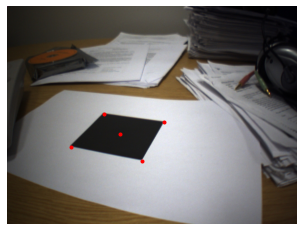

In [2]:
# Load image:
im = plt.imread('test104.jpg')

# Define points on image
XImCart = np.array([[140.3464,  212.1129,  346.3065,  298.1344,   247.9962],
             [308.9825,  236.7646,  255.4416,  340.7335,   281.5895]])

# Define 3D points of plane
XCart = np.array([[-50, -50,  50,  50, 0],
          [50, -50, -50,  50, 0],
          [0,   0,   0,   0, 0]])

# We assume that the intrinsic camera matrix K is known and has values:
K = np.array([[640,  0,  320],
             [0, 640, 240],
             [0,  0,  1]])

# Draw image and 2d points
plt.imshow(im)
plt.plot(XImCart[0,],XImCart[1,],'r.')
plt.axis('off')
plt.show()

### You've already implemented all of these functions in previous sections, so just copy them over to here. 

In [3]:
def calcBestHomography(pts1Cart, pts2Cart):
    
    # This function should apply the direct linear transform (DLT) algorithm to calculate the best 
    # homography that maps the cartesian points in pts1Cart to their corresonding matching cartesian poitns 
    # in pts2Cart.
    
    # This function calls solveAXEqualsZero. Make sure you are wary of how to reshape h into a 3 by 3 matrix. 

    n_points = pts1Cart.shape[1]
    
    # TO DO: replace this:
    #H = np.identity(3)

    # TO DO: 
    # First convert points into homogeneous representation
    # Hint: we've done this before  in the skeleton code we provide.
    
    # Then construct the matrix A, size (n_points * 2, 9)
    # Consult the notes!
    
    # Solve Ah = 0 using solveAXEqualsZero and get h.
    
    # Reshape h into the matrix H, values of h go first into rows of H

    
    #return H
    
    A = np.zeros((n_points*2,9))   
    for i in range(0,pts1Cart.shape[1]):
        A[2*i,:]= [0,0,0,-pts1Cart[0,i],-pts1Cart[1,i],-1,pts2Cart[1,i]*pts1Cart[0,i],pts2Cart[1,i]*pts1Cart[1,i],pts2Cart[1,i]]       
        A[2*i+1,:]= [pts1Cart[0,i],pts1Cart[1,i],1,0,0,0,-pts2Cart[0,i]*pts1Cart[0,i],-pts2Cart[0,i]*pts1Cart[1,i],-pts2Cart[0,i]]
    h = solveAXEqualsZero(A)
    H = (np.reshape(h,(3,3)))
    return H

In [4]:
def solveAXEqualsZero(A):
    # TO DO: Write this routine - it should solve Ah = 0. You can do this using SVD. Consult your notes! 
    # Hint: SVD will be involved.
    
    U,s,V = np.linalg.svd(A)
    
    V = V.T
    
    return V[:,-1]

In [5]:
# Read the next cell first for context!

def estimatePlanePose(XImCart,XCart,K):
    # The goal of this function is to estimate the pose of a plane relative to camera (extrinsic matrix)
    # given points in image space xImCart, points in 3D world space XCart, and an intrinsics matrix K.
    
    # TO DO: replace this
    T = []

    # TO DO: Convert Cartesian image points XImCart to homogeneous representation XImHom
    XImHom = np.vstack([XImCart,np.ones(XImCart.shape[1])])
    
    print("XImHom")
    print(XImHom)
    print("------")
    
    # TO DO: Convert image co-ordinates XImHom to normalized camera coordinates XCamHom
    xCamHom,_,_,_ = np.linalg.lstsq(K,XImHom)
    
    print("xCamHom")
    print(xCamHom)
    print("------")
    
    # TO DO: Estimate homography H mapping homogeneous (x,y) coordinates of positions
    # in real world to XCamHom (convert XCamHom to Cartesian, calculate the homography) -
    # use the routine you wrote for Practical 1B
    
    H = calcBestHomography(XCart,xCamHom)
    
    print("H")
    print(H)
    print("------")
    
    # TO DO: Estimate first two columns of rotation matrix R from the first two
    # columns of H using the SVD. NOTE: You do not need to transpose v from linalg.svd
    
    U,s,V = np.linalg.svd(H[:,0:2])
    print("SVD")
    print(U)
    print(s)
    print(V)
    rot2 = U @ np.array([[1,0],[0,1],[0,0]]) @ V
    
    print("rot2")
    print(rot2)
    print("------")

    # TO DO: Estimate the third column of the rotation matrix by taking the cross
    # product of the first two columns
    
    rot3 = np.cross(rot2[:,0],rot2[:,1]) 
    R = np.c_[rot2,rot3]
    
    print("rot3")
    print(rot3)
    print("------")
    
    print("R")
    print(R)
    print("------")
        
    # TO DO: Check that the determinant of the rotation matrix is positive - if
    # not then multiply last column by -1.
    
    if(np.linalg.det(R) < 0):
        R[:,-1] = (-1)*R[:,-1]

    # TO DO: Estimate the translation t by finding the appropriate scaling factor k
    # and applying it to the third colulmn of H
    
    scale_factor = np.mean(np.mean(H[:,0:2]/rot2,axis = 0))
    t = H[:,2]/scale_factor
    
    print("t")
    print(t)
    print("------")
    
    # TO DO: Check whether t_z is negative - if it is then multiply t by -1 and
    # the first two columns of R by -1.
    
    if(t[2] < 0):
        t = t*(-1)
        R[:,0:2] = R[:,0:2] * (-1)
        
    T = np.c_[R,t]
    
    T = np.vstack([T,np.array([0,0,0,1])])
    
    print("T")
    print(T)
    print("------")
            
    # TO DO: Assemble transformation into matrix form

    
    return T 

## Final coding bit

We can estimate `TEst` using `XImCart` and `XCart` with the method `estimatePlanePose`. We can then use this estimated extrinsics transformation and the camera instrinsics to project 3D cube points into 2D camera image space.

XImHom
[[140.346 212.113 346.307 298.134 247.996]
 [308.983 236.765 255.442 340.733 281.589]
 [  1.      1.      1.      1.      1.   ]]
------
xCamHom
[[-0.281 -0.169  0.041 -0.034 -0.113]
 [ 0.108 -0.005  0.024  0.157  0.065]
 [ 1.     1.     1.     1.     1.   ]]
------
H
[[-2.357e-03  7.185e-04  1.110e-01]
 [-3.076e-04 -1.074e-03 -6.356e-02]
 [ 1.026e-03  1.991e-03 -9.918e-01]]
------
SVD
[[-0.681  0.728  0.08 ]
 [-0.281 -0.361  0.889]
 [ 0.676  0.583  0.451]]
[0.003 0.002]
[[ 0.9    0.437]
 [-0.437  0.9  ]]
rot2
[[-0.931  0.357]
 [-0.095 -0.448]
 [ 0.353  0.82 ]]
------
rot3
[0.08  0.889 0.451]
------
R
[[-0.931  0.357  0.08 ]
 [-0.095 -0.448  0.889]
 [ 0.353  0.82   0.451]]
------
t
[  42.949  -24.593 -383.728]
------
T
[[ 9.306e-01 -3.571e-01  8.003e-02 -4.295e+01]
 [ 9.524e-02  4.475e-01  8.892e-01  2.459e+01]
 [-3.533e-01 -8.199e-01  4.505e-01  3.837e+02]
 [ 0.000e+00  0.000e+00  0.000e+00  1.000e+00]]
------
__
[[ 9.306e-01 -3.571e-01  8.003e-02 -4.295e+01]
 [ 9.524e-02  4.47

/home/apostolos/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


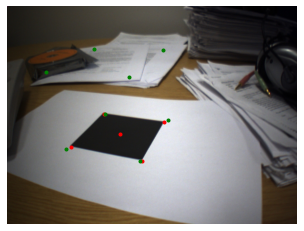

In [6]:
# TO DO: Use your routine to calculate TEst, the extrinsic matrix relating the
# plane position to the camera position. You'll need to use estimatePlanePose.

TEst = estimatePlanePose(XImCart,XCart,K)

print("__")
print(TEst)

# Define 3D points of plane
XWireFrameCart = np.array([[-50, -50,  50,  50, -50, -50,  50,  50],
                   [50, -50, -50,  50,  50, -50, -50,  50],
                    [0,   0,   0,   0, -100, -100, -100, -100]]);


XHom = np.vstack([XWireFrameCart,np.ones(XWireFrameCart.shape[1])])

mul= TEst @ XHom
K = np.c_[K,np.zeros((3))]
xImHom= K @ mul

XWireFrameCartProjected = xImHom[0:2,:]/xImHom[2,:]


# TO DO: Draw a wire frame cube, by projecting the vertices of a 3D cube through
# the projective camera and drawing lines betweeen the resulting 2d image points.
# You'll need to use projectiveCamera.
#XWireFrameCartProjected = np.array([[0], [0]])

# Draw image, 2d points and projected 3D cube points
plt.imshow(im)
plt.plot(XImCart[0,],XImCart[1,],'r.')
plt.plot(XWireFrameCartProjected[0,],XWireFrameCartProjected[1,],'g.')
plt.axis('off')
plt.show()

### QUESTIONS TO THINK ABOUT...

Do the results look realistic?
If not, then what factors do you think might be causing this?